# I. DETERMINING THE PROBLEM
Credit risk prediction using python algorithms.

The data contains information of customer using credit.

Results will show the prediction of credit fault.

- Target variable: Khả năng trả nợ

- Sex:
 0. Nữ
 1. Nam
- Hóa đơn tiền điện

- Số tiền vay

- Mục đích vay
1. Học tập
2. Tiêu dùng
3. Mua nhà
4. Mua xe
5. Đầu tư chứng khoán 

- Gia đình
1. Độc thân
2. Có gia đình
3. Ly hôn

- Thời gian làm việc

- Tuổi

- Thời hạn vay vốn

- Thu nhập hàng tháng

- Sao kê bảng lương
0. Có sao kê bảng lương
1. Không có sao kê bảng lương

- Tài sản thế chấp
0. Có tài sản thế chấp
1. Không có tài sản thế chấp

# II. EXPLORATORY DATA ANALYSIS (EDA)

# 1.Import dataset and necessary libraries

In [1]:
# conda install graphviz

In [2]:
# conda install -c conda-forge pydotplus

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('credit.xlsx')

In [5]:
data.head()

,ID,Giới tính,Hóa đơn tiền điện,Số tiền vay,Mục đích vay,Gia đình,Thời gian làm việc,Tuổi,Thời hạn vay vốn,Thu nhập hàng tháng,Sao kê bảng lương,Tài sản thế chấp,Khả năng trả nợ
0,1,1,300000,30000000,Đầu tư chứng khoán,Độc thân,10,20,3,2500000,Có,Không,Trả nợ trễ hạn
1,2,1,300000,100000000,Học tập,Có gia đình,9,22,5,15000000,Không,Không,Trả nợ trễ hạn
2,3,0,300000,300000000,Mua nhà,Ly hôn,6,25,3,4500000,Có,Không,Trả nợ trễ hạn
3,4,0,500000,55000000,Mua nhà,Có gia đình,15,50,5,6000000,Có,Không,Trả nợ đúng hạn
4,5,0,680000,30000000,Tiêu dùng,Ly hôn,5,20,3,15000000,Có,Có,Trả nợ đúng hạn


In [6]:
data.columns

Index(['ID', 'Giới tính', 'Hóa đơn tiền điện', 'Số tiền vay', 'Mục đích vay ',
       'Gia đình', 'Thời gian làm việc', 'Tuổi', 'Thời hạn vay vốn',
       'Thu nhập hàng tháng', 'Sao kê bảng lương', 'Tài sản thế chấp',
       'Khả năng trả nợ'],
      dtype='object')

# 2. Check for missing value

In [7]:
data.drop(['ID'],axis=1, inplace = True)

In [8]:
data.isnull().sum()

Giới tính              0
Hóa đơn tiền điện      0
Số tiền vay            0
Mục đích vay           0
Gia đình               0
Thời gian làm việc     0
Tuổi                   0
Thời hạn vay vốn       0
Thu nhập hàng tháng    0
Sao kê bảng lương      0
Tài sản thế chấp       0
Khả năng trả nợ        0
dtype: int64

# Check for duplicates

In [9]:
data.duplicated().sum()

0

# Data Transformation

In [10]:
data=data.rename(columns = {'Giới tính':'Sex','Hóa đơn tiền điện':'Electricity Bills',
                        'Số tiền vay':'Loan Amount','Mục đích vay ':'Loan Purpose',
                        'Gia đình':'Marital Status','Thời gian làm việc':'Time of Working',
                        'Tuổi':'Age','Thời hạn vay vốn':'Loan Term',
                        'Thu nhập hàng tháng':'Monthly Income','Sao kê bảng lương':'Salary Statement',
                        'Tài sản thế chấp':'Collateral','Khả năng trả nợ':'Repayment Ability'
                       })
data.head(5)

,Sex,Electricity Bills,Loan Amount,Loan Purpose,Marital Status,Time of Working,Age,Loan Term,Monthly Income,Salary Statement,Collateral,Repayment Ability
0,1,300000,30000000,Đầu tư chứng khoán,Độc thân,10,20,3,2500000,Có,Không,Trả nợ trễ hạn
1,1,300000,100000000,Học tập,Có gia đình,9,22,5,15000000,Không,Không,Trả nợ trễ hạn
2,0,300000,300000000,Mua nhà,Ly hôn,6,25,3,4500000,Có,Không,Trả nợ trễ hạn
3,0,500000,55000000,Mua nhà,Có gia đình,15,50,5,6000000,Có,Không,Trả nợ đúng hạn
4,0,680000,30000000,Tiêu dùng,Ly hôn,5,20,3,15000000,Có,Có,Trả nợ đúng hạn


# 3. Data descriptive

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sex                2997 non-null   int64 
 1   Electricity Bills  2997 non-null   int64 
 2   Loan Amount        2997 non-null   int64 
 3   Loan Purpose       2997 non-null   object
 4   Marital Status     2997 non-null   object
 5   Time of Working    2997 non-null   int64 
 6   Age                2997 non-null   int64 
 7   Loan Term          2997 non-null   int64 
 8   Monthly Income     2997 non-null   int64 
 9   Salary Statement   2997 non-null   object
 10  Collateral         2997 non-null   object
 11  Repayment Ability  2997 non-null   object
dtypes: int64(7), object(5)
memory usage: 281.1+ KB


In [12]:
numerical_features = ['Electricity Bills', 'Loan Amount','Monthly Income','Age','Time of Working','Loan Term']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  6


In [13]:
data[numerical_features].describe()

,Electricity Bills,Loan Amount,Monthly Income,Age,Time of Working,Loan Term
count,2.997000e+03,2.997000e+03,2.997000e+03,2997.00000,2997.000000,2997.000000
mean,9.663864e+05,6.304972e+07,2.122523e+07,35.14648,7.959293,3.163830
std,7.759663e+05,5.841568e+07,2.979919e+07,13.09270,4.332363,1.144523
min,0.000000e+00,1.500000e+07,2.500000e+06,20.00000,1.000000,1.000000
25%,3.000000e+05,3.000000e+07,4.500000e+06,22.00000,4.000000,2.000000
50%,7.000000e+05,5.500000e+07,1.500000e+07,30.00000,8.000000,3.000000
75%,1.500000e+06,8.000000e+07,2.000000e+07,50.00000,12.000000,4.000000
max,3.000000e+06,3.000000e+08,1.500000e+08,60.00000,15.000000,10.000000


In [14]:
categorical_features = [x for x in data.columns if (x not in numerical_features and x != 'Repayment Ability')]
print('Number of categorical features: ', len(categorical_features))

Number of categorical features:  5


In [15]:
for col in categorical_features:
    data[col] = data[col].astype('object')

In [16]:
data[categorical_features].describe()

,Sex,Loan Purpose,Marital Status,Salary Statement,Collateral
count,2997,2997,2997,2997,2997
unique,2,5,3,2,2
top,0,Đầu tư chứng khoán,Ly hôn,Có,Có
freq,1842,638,1039,1516,1510


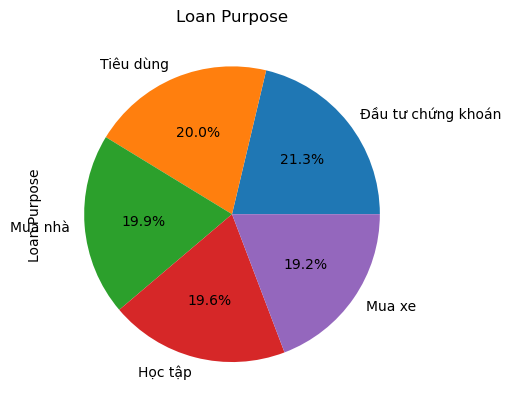

In [17]:
counts = data['Loan Purpose'].value_counts()
counts.plot.pie(autopct='%1.1f%%')
plt.title('Loan Purpose')
plt.show()

The result shows that the percentage of  "Tiêu dùng" and "Mua nhà"  make up the majority of "Mục đích vay" with 24.6% and 26.5% respectivevly.

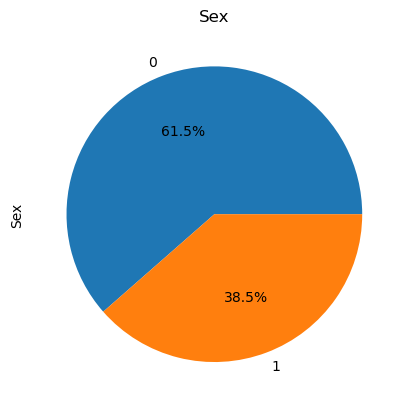

In [18]:
counts = data['Sex'].value_counts()
counts.plot.pie(autopct='%1.1f%%')
plt.title('Sex')
plt.show()

Most of borrowers are female.

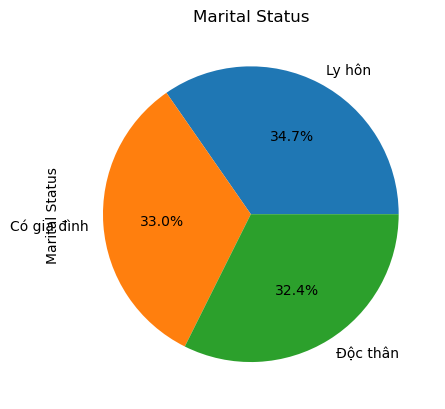

In [19]:
counts = data['Marital Status'].value_counts()
counts.plot.pie(autopct='%1.1f%%')
plt.title('Marital Status')
plt.show()

In the context of "Gia đình", the number of customer who have their own families is greater than disvorced and alone one ( with the percentage of nearly 50%) 

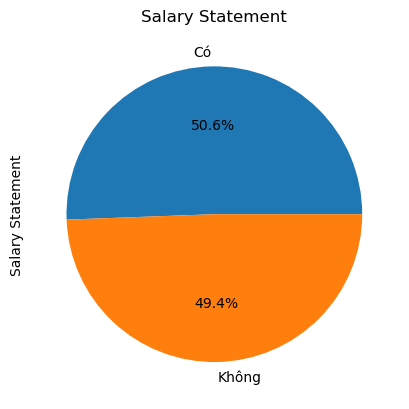

In [20]:
counts = data['Salary Statement'].value_counts()
counts.plot.pie(autopct='%1.1f%%')
plt.title('Salary Statement')
plt.show()

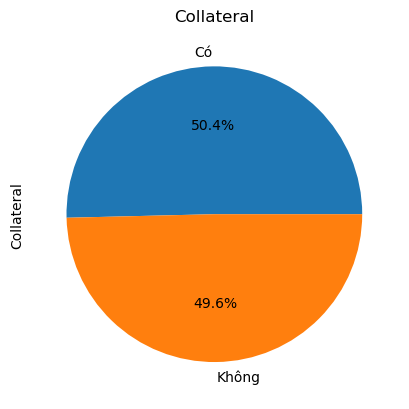

In [21]:
counts = data['Collateral'].value_counts()
counts.plot.pie(autopct='%1.1f%%')
plt.title('Collateral')
plt.show()

There is no significant different in two varibale "Sao kê bảng lương" and "Tài sản thế chấp".

# 3.Check if there is any imbalance in the target variable of dataset

Trả nợ trễ hạn     1518
Trả nợ đúng hạn    1479
Name: Repayment Ability, dtype: int64


<Axes: ylabel='Tỉ lệ'>

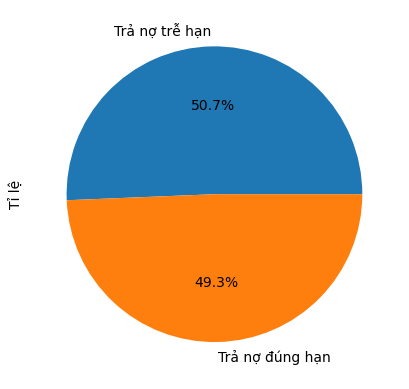

In [22]:
print(data["Repayment Ability"].value_counts())

data.groupby('Repayment Ability').size().plot(kind='pie',
                                       y = "Repayment Ability",
                                       label = "Tỉ lệ",
                                       autopct='%1.1f%%')

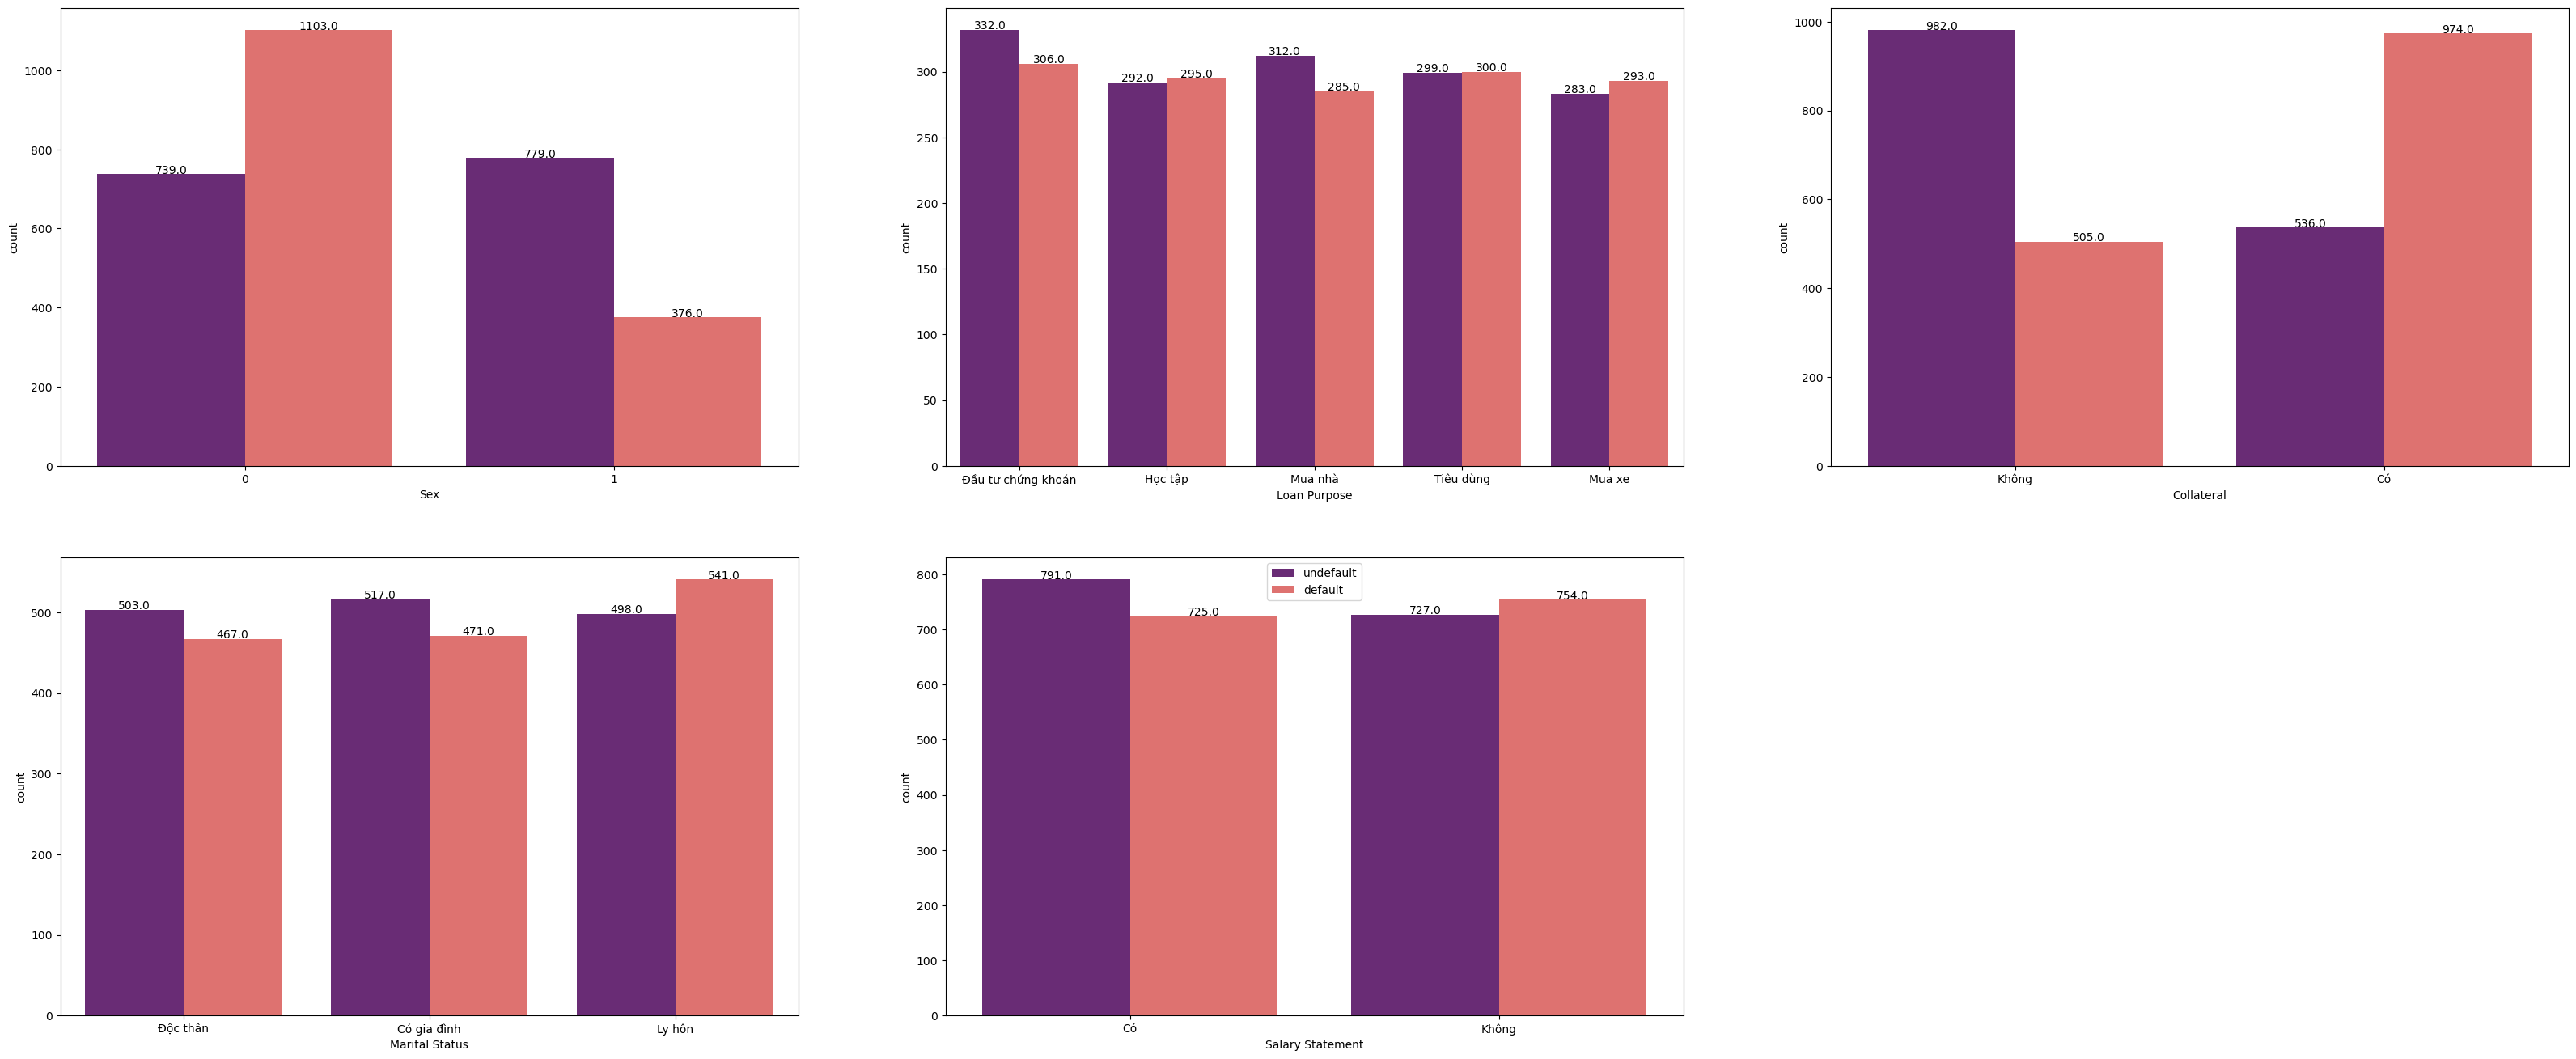

In [23]:
plt.figure(figsize=(40,25))
def count(categorical_features):
  x=1
  for i in categorical_features:
    plt.subplot(3,3,x)
    ax = sns.countplot(x=i,data=data, palette='magma',hue='Repayment Ability')
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)
    plt.legend([],[], frameon=False)
    x+=1
  plt.legend(['undefault', 'default'])
  plt.savefig('Data visualization.png')
  

count(['Sex', 'Loan Purpose','Collateral', 'Marital Status', 
    'Salary Statement'])

# 4. Replace data with numerical value

In [24]:
data = data.replace({"Repayment Ability":{"Trả nợ đúng hạn":0,
                                         "Trả nợ trễ hạn":1},
                   "Collateral": {"Có":0,
                                       "Không":1},
                   "Salary Statement":{"Có":0,
                                       "Không":1},
                   "Marital Status":{"Độc thân":1,
                               "Có gia đình":2,
                               "Ly hôn":3},
                    "Loan Purpose":{"Học tập":1,
                                   "Tiêu dùng":2,
                                   "Mua xe":3,
                                   "Mua nhà":4,
                                   "Đầu tư chứng khoán":5}})

In [25]:
data.head()

,Sex,Electricity Bills,Loan Amount,Loan Purpose,Marital Status,Time of Working,Age,Loan Term,Monthly Income,Salary Statement,Collateral,Repayment Ability
0,1,300000,30000000,5,1,10,20,3,2500000,0,1,1
1,1,300000,100000000,1,2,9,22,5,15000000,1,1,1
2,0,300000,300000000,4,3,6,25,3,4500000,0,1,1
3,0,500000,55000000,4,2,15,50,5,6000000,0,1,0
4,0,680000,30000000,2,3,5,20,3,15000000,0,0,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sex                2997 non-null   object
 1   Electricity Bills  2997 non-null   int64 
 2   Loan Amount        2997 non-null   int64 
 3   Loan Purpose       2997 non-null   int64 
 4   Marital Status     2997 non-null   int64 
 5   Time of Working    2997 non-null   int64 
 6   Age                2997 non-null   int64 
 7   Loan Term          2997 non-null   int64 
 8   Monthly Income     2997 non-null   int64 
 9   Salary Statement   2997 non-null   int64 
 10  Collateral         2997 non-null   int64 
 11  Repayment Ability  2997 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 281.1+ KB


# III. Feature Selection and Train Test Split

# 1. Feature Selection

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

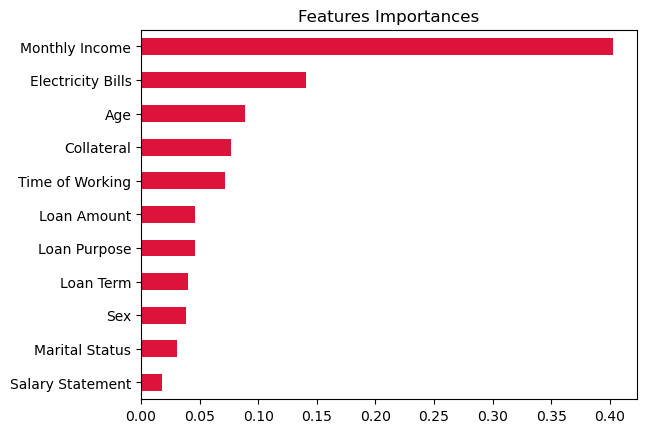

In [28]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = data.drop('Repayment Ability', axis=1)
y = data['Repayment Ability']

# Tạo mô hình Random Forest với 100 cây quyết định
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf.fit(X, y)

# Lấy độ quan trọng của các tính năng
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sắp xếp theo thứ tự giảm dần và hiển thị kết quả
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='Crimson')
plt.title('Features Importances')
plt.show()

In [29]:
target = ['Repayment Ability']
features = ['Monthly Income','Electricity Bills','Age','Collateral','Loan Amount','Time of Working']

In [30]:
X = data[features]
y = data[target].values

In [31]:
print('Target: ', target)
print('Features: ', features)

Target:  ['Repayment Ability']
Features:  ['Monthly Income', 'Electricity Bills', 'Age', 'Collateral', 'Loan Amount', 'Time of Working']


In [32]:
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

# 2. Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = n_state)
X_train.shape, X_test.shape 

((2697, 6), (300, 6))

# 3. Scaling data

In [34]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# III. Evaluation with algorithms

# 1. Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [36]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_train, y_pred))

[[1317   10]
 [  26 1344]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1327
           1       0.99      0.98      0.99      1370

    accuracy                           0.99      2697
   macro avg       0.99      0.99      0.99      2697
weighted avg       0.99      0.99      0.99      2697

Random Forest accuracy:  0.9866518353726362


In [37]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[139  13]
 [ 26 122]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       152
           1       0.90      0.82      0.86       148

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

Random Forest accuracy:  0.87


In [38]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data.loc[:,features].columns, 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
0,Monthly Income,0.431416
1,Electricity Bills,0.165802
5,Time of Working,0.131833
2,Age,0.127473
3,Collateral,0.083071
4,Loan Amount,0.060405


<Axes: ylabel='FeatureName'>

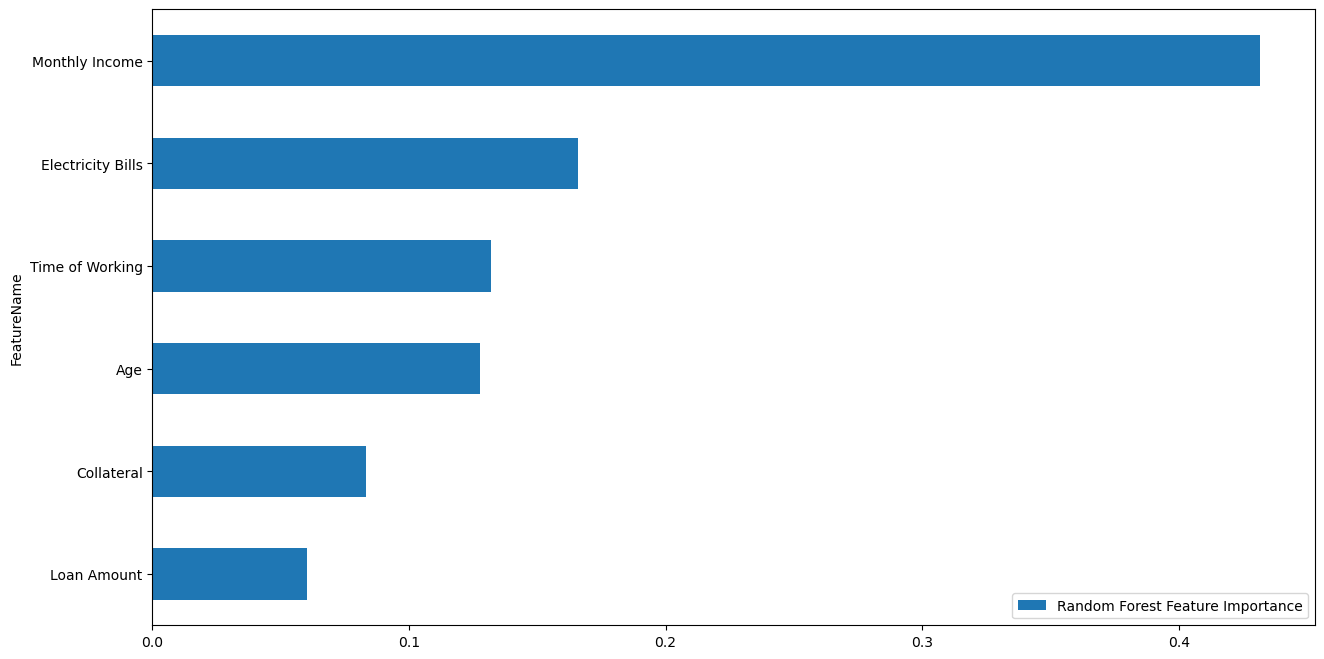

In [39]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19752\1662587078.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19752\1662587078.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


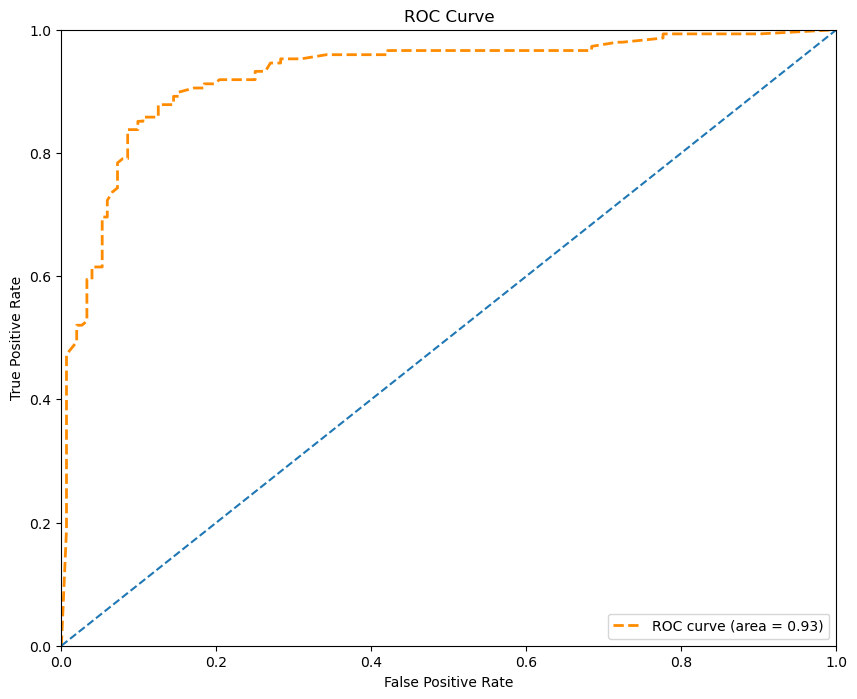

In [40]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# 2.Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train.ravel())

y_pred2 = LR_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred2))
print(classification_report(y_train,y_pred2))
print('Logistic Regression accuracy: ', accuracy_score(y_train, y_pred2))

[[952 375]
 [371 999]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1327
           1       0.73      0.73      0.73      1370

    accuracy                           0.72      2697
   macro avg       0.72      0.72      0.72      2697
weighted avg       0.72      0.72      0.72      2697

Logistic Regression accuracy:  0.7233963663329626


In [42]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train.ravel())

y_pred2 = LR_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred2))

[[113  39]
 [ 43 105]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       152
           1       0.73      0.71      0.72       148

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

Logistic Regression accuracy:  0.7266666666666667


In [43]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': data.loc[:,features].columns, 'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Logistic Regression Feature Importance
0,Monthly Income,-0.939720
3,Collateral,0.619526
1,Electricity Bills,-0.384566
2,Age,-0.152957
4,Loan Amount,0.021869
5,Time of Working,0.020052


<Axes: ylabel='FeatureName'>

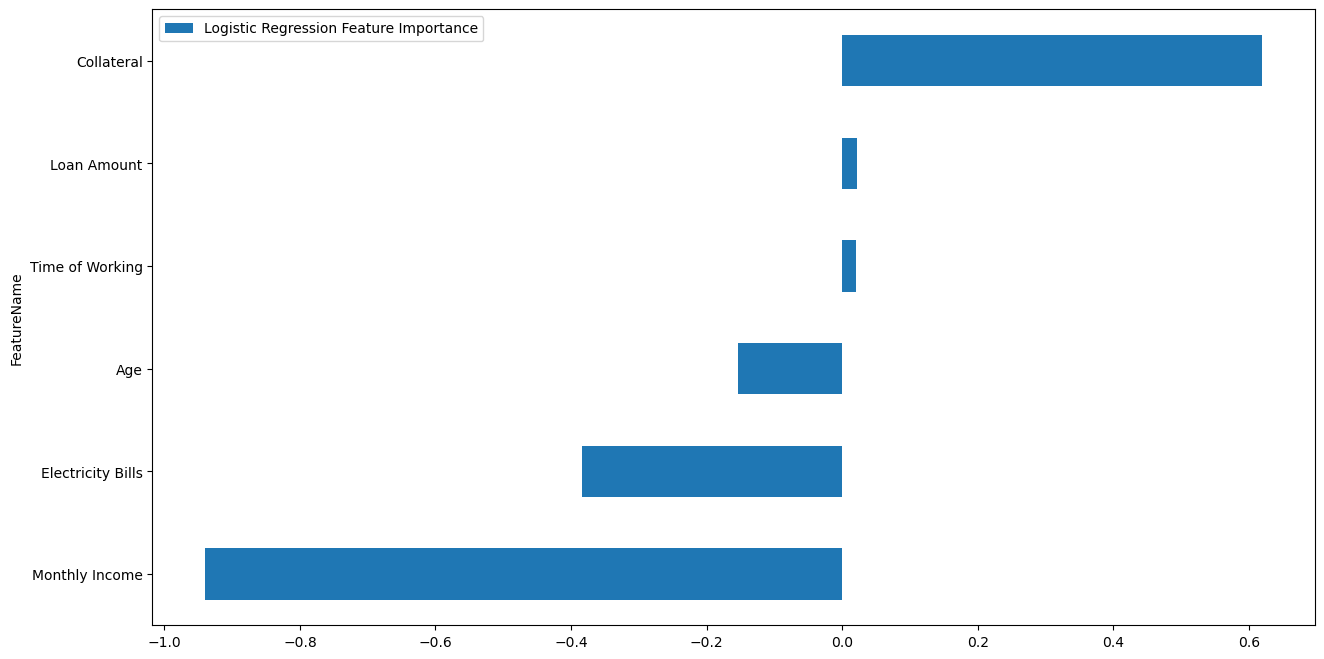

In [44]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

In [45]:
import statsmodels.api as SM

model_1 = SM.Logit(y_train, X_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.582516
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2697
Model:                          Logit   Df Residuals:                     2691
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.1595
Time:                        10:14:32   Log-Likelihood:                -1571.0
converged:                       True   LL-Null:                       -1869.1
Covariance Type:            nonrobust   LLR p-value:                1.438e-126
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9065      0.085    -10.657      0.000      -1.073      -0.740
x2            -0.3874      0.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19752\1662587078.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19752\1662587078.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


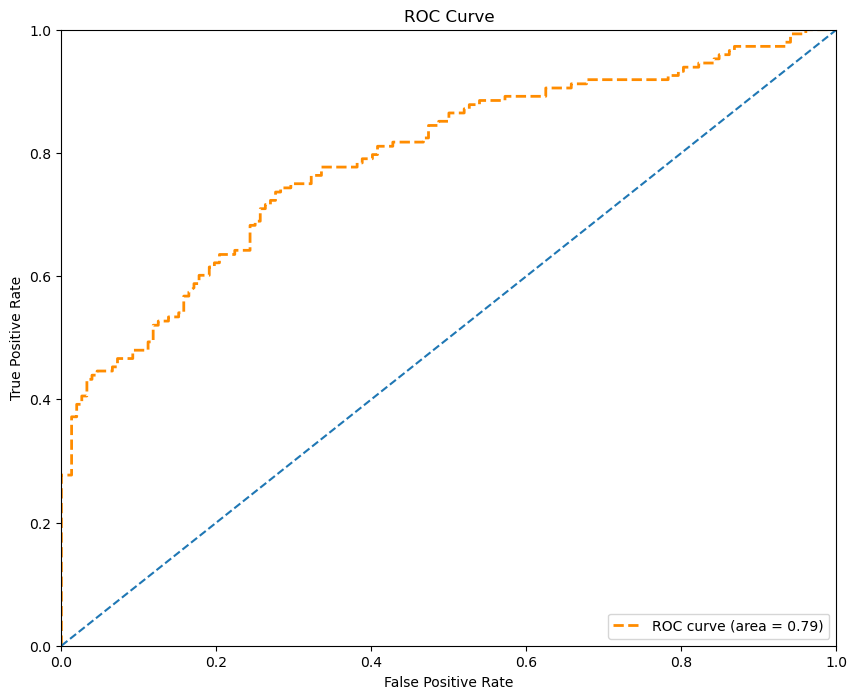

In [46]:
# ROC
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# 3.Decision Tree Classifier¶

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Chọn biến làm root node bằng hệ số gini 
X = data.drop('Repayment Ability', axis=1)
y = data['Repayment Ability']

# Create a decision tree classifier with Gini impurity as the criterion for splitting
clf = DecisionTreeClassifier(criterion="gini")

# Fit the decision tree on the data
clf.fit(X, y)

# Print the feature importances to see which feature was selected as the root node
print(clf.feature_importances_)


[0.02582132 0.14304771 0.03269964 0.04728689 0.0280167  0.06540844
 0.09082441 0.04236973 0.45559499 0.01184528 0.05708488]


In [49]:
# features= ['Sex','Loan Amount', 'Loan Purpose','Marital Status','Sao ke bang luong']

In [50]:
DT_classifier = DecisionTreeClassifier(max_depth=5,min_samples_leaf=100)
DT_classifier.fit(X_train, y_train.ravel())

y_pred3 = DT_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred3))
print(classification_report(y_train,y_pred3))
print('Decision Tree accuracy: ', accuracy_score(y_train, y_pred3))

[[1215  112]
 [ 280 1090]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1327
           1       0.91      0.80      0.85      1370

    accuracy                           0.85      2697
   macro avg       0.86      0.86      0.85      2697
weighted avg       0.86      0.85      0.85      2697

Decision Tree accuracy:  0.8546533185020393


In [51]:
DT_classifier = DecisionTreeClassifier(max_depth=5,min_samples_leaf=100)
DT_classifier.fit(X_train, y_train.ravel())

y_pred3 = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred3))

[[141  11]
 [ 25 123]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       152
           1       0.92      0.83      0.87       148

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Decision Tree accuracy:  0.88


In [52]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data.loc[:,features].columns, 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
0,Monthly Income,0.744197
1,Electricity Bills,0.146817
3,Collateral,0.073808
2,Age,0.031480
4,Loan Amount,0.003146
5,Time of Working,0.000551


<Axes: ylabel='FeatureName'>

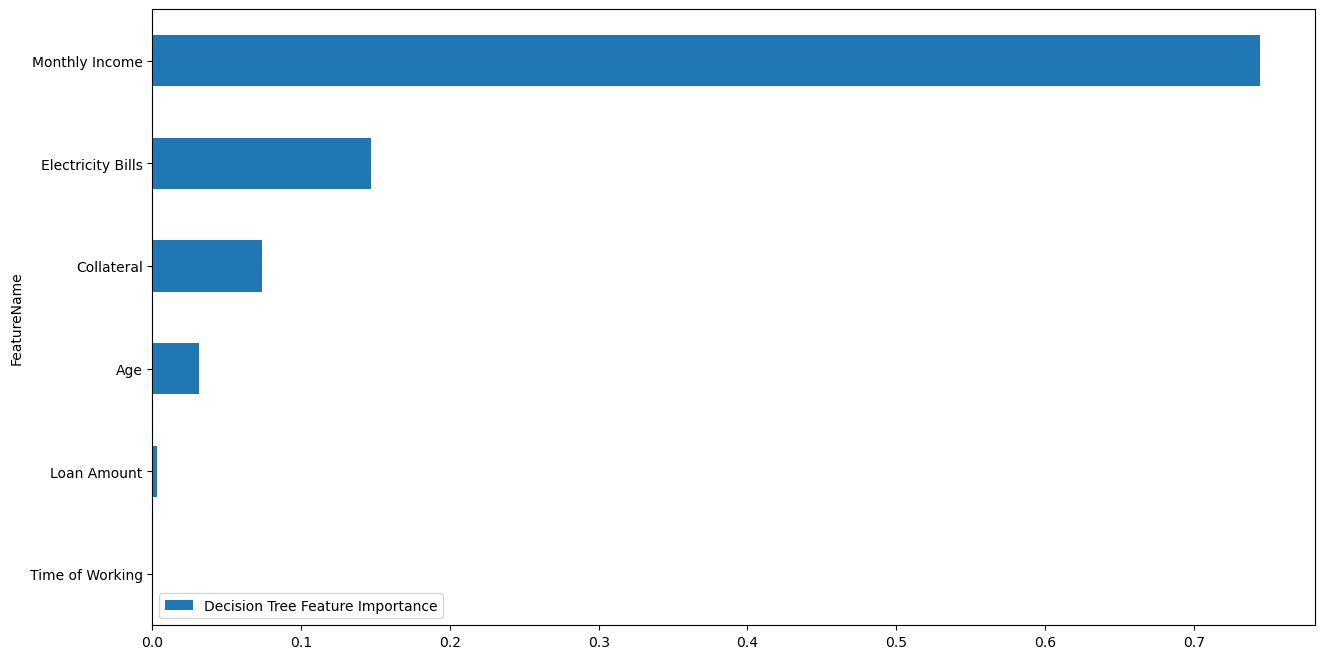

In [53]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

In [54]:
X_plot_tree = data[features]

In [55]:
from sklearn import tree
DT_classifier2 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=100)
DT_classifier2.fit(X_train, y_train.ravel())

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)

In [56]:
y_prob_train_dt2 = DT_classifier2.predict_proba(X_train)
y_pred_train_dt2 = DT_classifier2.predict(X_train)
df_report = pd.DataFrame({'Y observed':y_train.ravel(), 'Y classification':y_pred_train_dt2.ravel(), 'Y probability':y_prob_train_dt2[:,1]})
df_report

,Y observed,Y classification,Y probability
0,1,0,0.435484
1,0,0,0.009231
2,1,1,0.975000
3,0,0,0.307692
4,0,0,0.009231
...,...,...,...
2692,0,0,0.009231
2693,1,0,0.435484
2694,1,1,0.844037
2695,0,0,0.235075


In [57]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

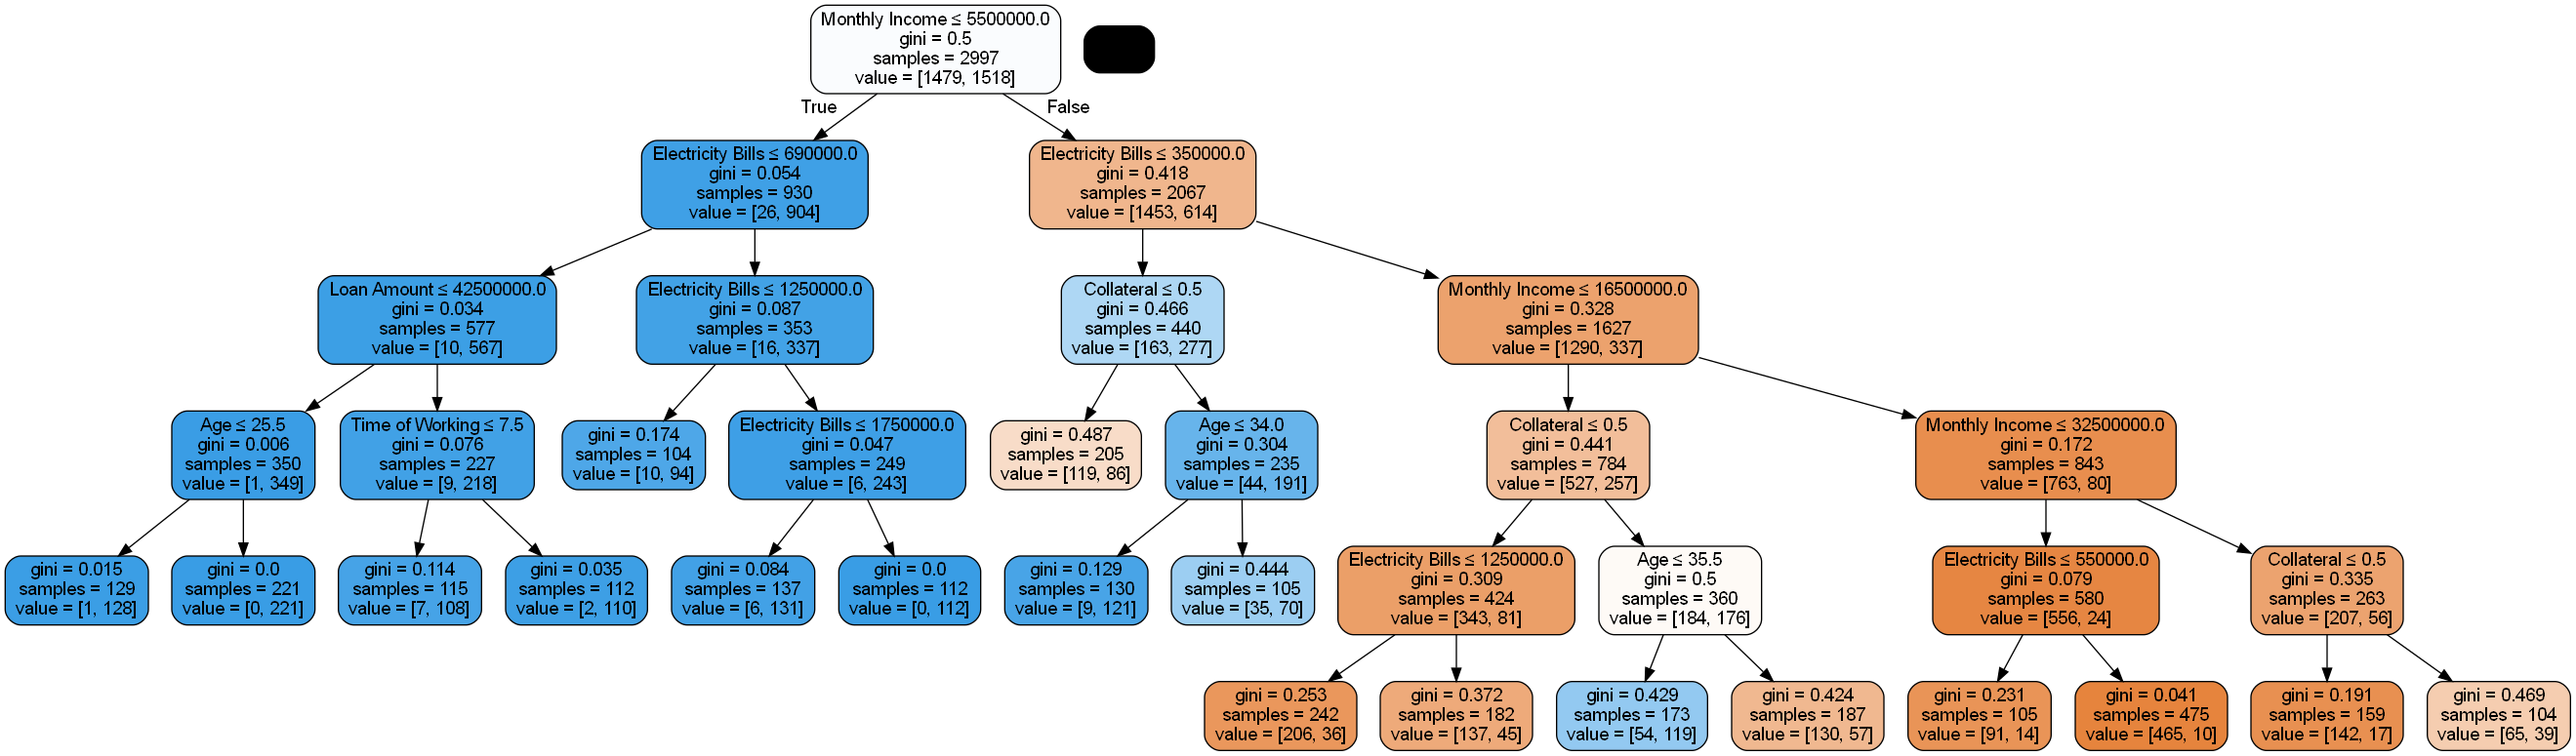

In [58]:
dot_data = StringIO()

clf = DT_classifier2
clf.fit(X_plot_tree.values, y.ravel())
export_graphviz(clf, out_file=dot_data, feature_names = features, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19752\1662587078.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19752\1662587078.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


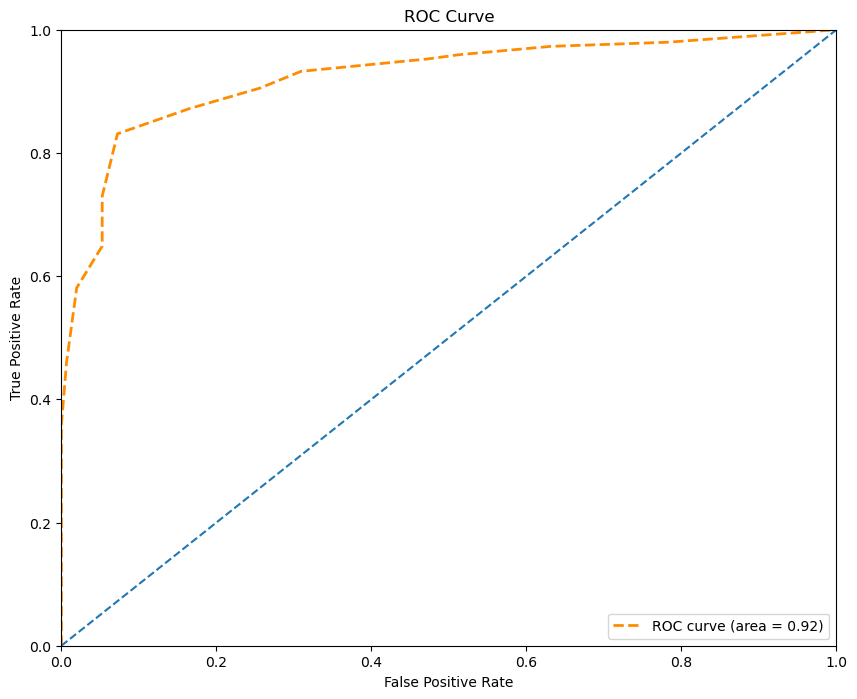

In [59]:
 # ROC
y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# XGBOOST

In [60]:
pip install xgboost

In [61]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [62]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred4 = XGB_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred4))
print(classification_report(y_train,y_pred4))
print('XGBoost accuracy: ', accuracy_score(y_train, y_pred4))

[[1291   36]
 [  52 1318]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1327
           1       0.97      0.96      0.97      1370

    accuracy                           0.97      2697
   macro avg       0.97      0.97      0.97      2697
weighted avg       0.97      0.97      0.97      2697

XGBoost accuracy:  0.9673711531331108


In [63]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred4 = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred4))

[[139  13]
 [ 33 115]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       152
           1       0.90      0.78      0.83       148

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

XGBoost accuracy:  0.8466666666666667


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19752\1662587078.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19752\1662587078.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


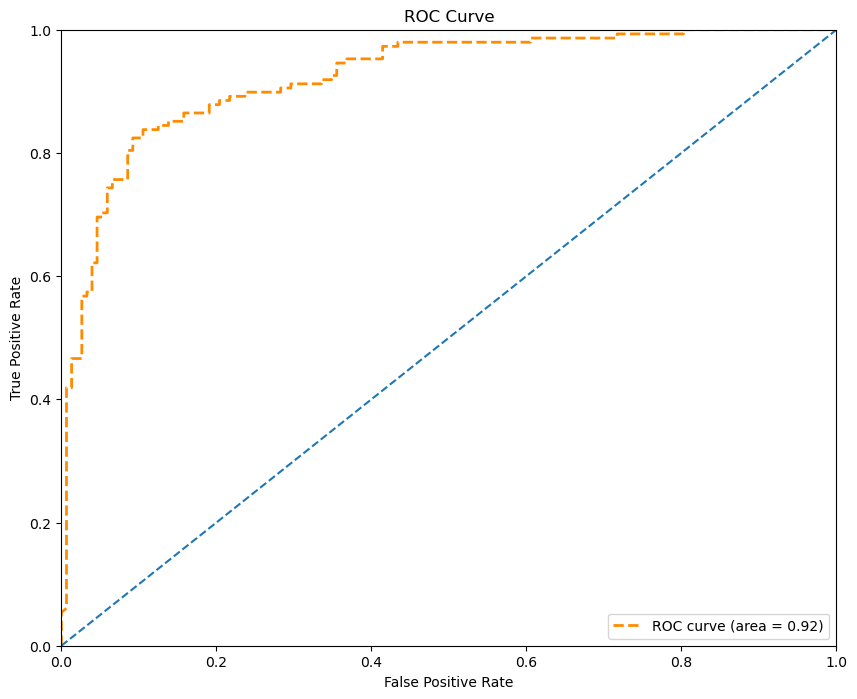

In [64]:
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# Support Vector Machine

In [65]:
from sklearn.svm import SVC

In [66]:
# Xây dựng mô hình SVM
SVM_classifier = SVC(kernel = 'linear', random_state = 0)

# Đưa giá trị X_train và y_train vào mô hình SVM
SVM_classifier.fit(X_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = SVM_classifier.predict(X_train)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('SVM accuracy: ', accuracy_score(y_train, y_pred))

Confusion matrix:
      0    1
0  1006  321
1   444  926 

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1327
           1       0.74      0.68      0.71      1370

    accuracy                           0.72      2697
   macro avg       0.72      0.72      0.72      2697
weighted avg       0.72      0.72      0.72      2697

SVM accuracy:  0.7163515016685206


In [67]:
# Xây dựng mô hình SVM
SVM_classifier = SVC(kernel = 'linear', random_state = 0)

# Đưa giá trị X_train và y_train vào mô hình SVM
SVM_classifier.fit(X_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = SVM_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('SVM accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:
     0   1
0  119  33
1   51  97 

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       152
           1       0.75      0.66      0.70       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

SVM accuracy:  0.72


# ROC curve comparison

In [68]:
from sklearn import metrics

In [69]:
from sklearn.metrics import RocCurveDisplay

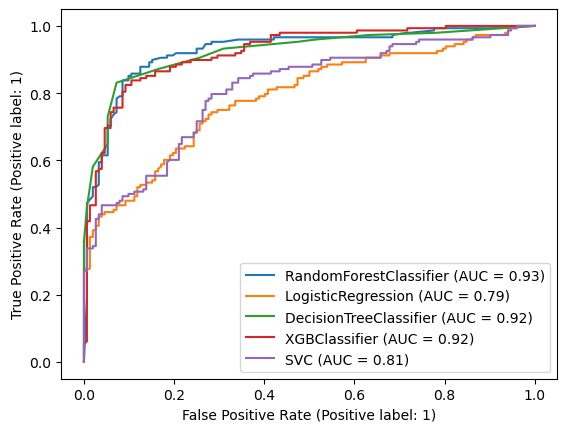

In [70]:
disp = RocCurveDisplay.from_estimator(RF_classifier, X_test, y_test)
RocCurveDisplay.from_estimator(LR_classifier, X_test, y_test, ax = disp.ax_);
RocCurveDisplay.from_estimator(DT_classifier, X_test, y_test, ax = disp.ax_);
RocCurveDisplay.from_estimator(XGB_classifier, X_test, y_test, ax = disp.ax_);
RocCurveDisplay.from_estimator(SVM_classifier, X_test, y_test, ax = disp.ax_);


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

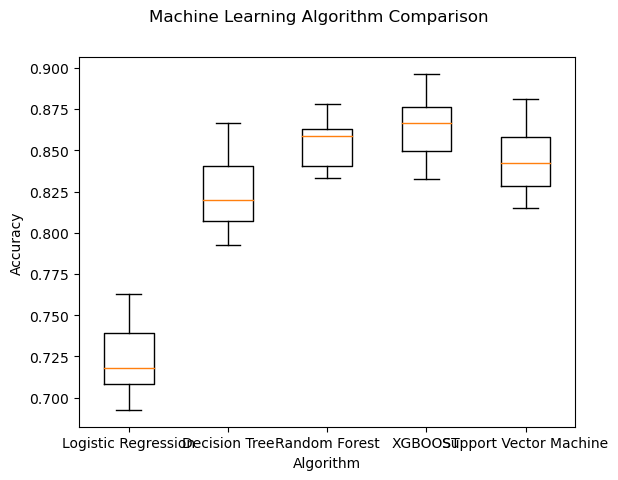

In [71]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBOOST', XGBClassifier()),
    ('Support Vector Machine', SVC())
]

# Evaluate each model on the test set using 10-fold cross-validation and store the results
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

# Generate a boxplot comparing the model performance
fig = plt.figure()
fig.suptitle('Machine Learning Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

# Predict new borrower with a Random sample test

In [72]:
target = ['Repayment Ability']
features = ['Monthly Income','Electricity Bills','Age','Collateral','Loan Amount','Time of Working']

In [73]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [74]:
XGB_classifier.fit(X_train.values, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
import random
num_datasets = 5
datasets = []
for _ in range(num_datasets):
    dataset = [
        round(random.randint(2500000, 150000000), -5),   # Monthly Income (assuming continuous values)
        round(random.randint(0, 3000000), -5),           # Electricity Bills (assuming continuous values)
        random.randint(20, 60),               # Age (assuming discrete values)
        random.choice([0, 1]),                       #Collateral (assuming categorical values)
        random.randint(15000000, 300000000),                       # Loan Amount (assuming categorical values)
        round(random.randint(1, 15), -5)     # Time of woking (assuming continuous values)
    ]
    datasets.append(dataset)


In [76]:
datasets

[[44300000, 1000000, 31, 1, 170754887, 0],
 [109700000, 600000, 28, 0, 222938707, 0],
 [113300000, 900000, 26, 1, 103592355, 0],
 [144200000, 1800000, 46, 1, 275326479, 0],
 [143800000, 700000, 30, 0, 209244244, 0]]

In [77]:
predictions = []
# Predict the "Repayment Ability" for each data set in datasets
for dataset in datasets:
    prediction = XGB_classifier.predict([dataset])
    predictions.append(prediction)
# Print the predictions
for prediction in predictions:
    print(prediction)

[0]
[0]
[0]
[0]
[0]


# Predict new borrower with an available dataset

In [79]:
target = ['Repayment Ability']
features = ['Monthly Income','Electricity Bills','Age','Collateral','Loan Amount','Time of Working']
import pandas as pd

classifier = XGBClassifier()  # Replace with your actual trained classifier
classifier.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

dataset = pd.read_excel('credit-predict-data.xlsx')


In [80]:
dataset.head()

,ID,Giới tính,Hóa đơn tiền điện,Số tiền vay,Mục đích vay,Gia đình,Thời gian làm việc,Tuổi,Thời hạn vay vốn,Thu nhập hàng tháng,Sao kê bảng lương,Tài sản thế chấp,Khả năng trả nợ
0,1,1,300000,30000000,Đầu tư chứng khoán,Độc thân,11,20,3,2500000,Có,Không,NaN
1,2,1,300000,100000000,Học tập,Có gia đình,14,22,5,15000000,Không,Không,NaN
2,3,0,300000,300000000,Mua nhà,Ly hôn,1,25,3,4500000,Có,Không,NaN
3,4,0,500000,55000000,Mua nhà,Có gia đình,3,50,5,6000000,Có,Không,NaN
4,5,0,680000,30000000,Tiêu dùng,Ly hôn,14,20,3,15000000,Có,Có,NaN


In [81]:
dataset =dataset.rename(columns = {'Giới tính':'Sex','Hóa đơn tiền điện':'Electricity Bills',
                        'Số tiền vay':'Loan Amount','Mục đích vay ':'Loan Purpose',
                        'Gia đình':'Marital Status','Thời gian làm việc':'Time of Working',
                        'Tuổi':'Age','Thời hạn vay vốn':'Loan Term',
                        'Thu nhập hàng tháng':'Monthly Income','Sao kê bảng lương':'Salary Statement',
                        'Tài sản thế chấp':'Collateral','Khả năng trả nợ':'Repayment Ability'
                       })
dataset.head(5)

,ID,Sex,Electricity Bills,Loan Amount,Loan Purpose,Marital Status,Time of Working,Age,Loan Term,Monthly Income,Salary Statement,Collateral,Repayment Ability
0,1,1,300000,30000000,Đầu tư chứng khoán,Độc thân,11,20,3,2500000,Có,Không,NaN
1,2,1,300000,100000000,Học tập,Có gia đình,14,22,5,15000000,Không,Không,NaN
2,3,0,300000,300000000,Mua nhà,Ly hôn,1,25,3,4500000,Có,Không,NaN
3,4,0,500000,55000000,Mua nhà,Có gia đình,3,50,5,6000000,Có,Không,NaN
4,5,0,680000,30000000,Tiêu dùng,Ly hôn,14,20,3,15000000,Có,Có,NaN


In [82]:
dataset = dataset.replace({"Collateral": {"Có":0,
                                       "Không":1},
                   "Salary Statement":{"Có":0,
                                       "Không":1},
                   "Marital Status":{"Độc thân":1,
                               "Có gia đình":2,
                               "Ly hôn":3},
                    "Loan Purpose":{"Học tập":1,
                                   "Tiêu dùng":2,
                                   "Mua xe":3,
                                   "Mua nhà":4,
                                   "Đầu tư chứng khoán":5}})

In [83]:
dataset = dataset.drop(['ID'],axis=1)
dataset.head()

,Sex,Electricity Bills,Loan Amount,Loan Purpose,Marital Status,Time of Working,Age,Loan Term,Monthly Income,Salary Statement,Collateral,Repayment Ability
0,1,300000,30000000,5,1,11,20,3,2500000,0,1,NaN
1,1,300000,100000000,1,2,14,22,5,15000000,1,1,NaN
2,0,300000,300000000,4,3,1,25,3,4500000,0,1,NaN
3,0,500000,55000000,4,2,3,50,5,6000000,0,1,NaN
4,0,680000,30000000,2,3,14,20,3,15000000,0,0,NaN


In [84]:
# Preprocess the data
X = dataset[features] 

# Predict the "Repayment Ability" for the data
predictions = classifier.predict(X)

# Fill the predictions into the CSV data
dataset['Repayment Ability'] = predictions

# Save the updated data with predictions to a new CSV file
output_path = 'path_to_save_updated_data.csv'
dataset.to_csv(output_path, index=False)

In [85]:
dataset.head(5)

,Sex,Electricity Bills,Loan Amount,Loan Purpose,Marital Status,Time of Working,Age,Loan Term,Monthly Income,Salary Statement,Collateral,Repayment Ability
0,1,300000,30000000,5,1,11,20,3,2500000,0,1,1
1,1,300000,100000000,1,2,14,22,5,15000000,1,1,1
2,0,300000,300000000,4,3,1,25,3,4500000,0,1,1
3,0,500000,55000000,4,2,3,50,5,6000000,0,1,0
4,0,680000,30000000,2,3,14,20,3,15000000,0,0,0
